# Lekce 1

V této lekci projdeme následující témata:
- Jupyter notebooky,
- základy práce v Pandas,
- vizualizace.

Ke zpracování dat využijeme moduly  `pandas` a ke tvorbě vizualizací modul `matplotlib` a jeho nadstavbu `seaborn`.

V rámci lekce budeme využívat datový soubor [Hotel Booking Demand EDA/ Data Visualisation](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) z webu [Kaggle.com](https://www.kaggle.com/). Popis dat je ve článku [Hotel booking demand datasets
](https://www.sciencedirect.com/science/article/pii/S2352340918315191) Soubor obsahuje informace o rezervacích hotelů ze serveru [Booking.com](booking.com). Data si můžeš stáhnout [zde](hotel_bookings.csv).

Pokud máme data ze serveru Kaggle.com, můžeme se podívat i na výsledky analýz ostatních uživatelů a uživatelek. Po otevření příslušného datasetu stačí kliknout na záložku *Code*. Pro náš dataset jich tam je aktuálně 431. Tyto analýzy jsou vytvořeny formou Jupyter notebooků.

## Používání Jupyter notebooků

Jupyter notebook je prostředí používané v datové analýzy a data science, které umožňuje kombinovat kód v Pythonu, texty, vizualizace a tabulky. Jupyter notebooky je možné editovat přímo v editoru Visual Studio Code. Jupyter notebooky je poté možno vyexportovat do běžně používaných formátů (např. PDF) nebo nahrát na internet (např. na server GitHub nebo Kaggle), ostatním pak k jejich otevření stačí internetový prohlížeč.

Hlavním rozdílem oproti klasickému programu je v tom, že notebook je rozdělený do tzv. buněk (`cell`) a je možné spustit vždy jen nějakou konkrétní buňku. Dalším zásadním rozdílem je, že výsledky všech příkazů jsou uchovány v paměti počítače. Pokud tedy například v buňce máme příkaz na vytvoření nějaké proměnné, po spuštění buňky proměnná zůstane v paměti a můžeme ji číst v nějaké další buňce. Importy pak stačí mít vložené v jedné buňce a importované moduly můžeme používat v ostatních buňkách.

Tento přístup má určité výhody i nevýhody. Pokud například stahujeme větší objem dat z internetu, stačí nám data stáhnout jen jednou a nemusíme se zdržovat (a zbytečně zatěžovat vzdálený server) opakovaným načítáním při každé změně kódu. Pokud si ale z dat něco smažeme, musíme data stáhnout znovu a to znamená ruční spuštění kódu ve více buňkách. Alternativně je možné využít i tlačítko `Run All`.

K použití Jupyter notebooků je nutné nainstalovat modul `jupyterlab` příkazem:

```
pip install jupyterlab
```

Dále je potřeba nainstalovat doplněk `Jupyter` do VS Code. Poté můžete vytvořit nový notebook jako běžný soubor, který má příponu `.ipynb`. Nové buňky přidáváme pomocí tlačítek `+ Code` (buňka s kódem) a `+ Markdown` (buňka s textem, k formátování textu se používá značkovací jazyk [Markdown](https://www.markdownguide.org/cheat-sheet/)). Ke spuštění buňky můžeme použít ikonku `Execute Cell` u příslušné buňky. Všechny buňky v rámci notebooku můžeme spustit s využitím tlačítka `Run All`.

## Načtení dat

Na začátku načteme data. Obvykle vkládáme na začátek programu i import modulů, i když je používáme až později. Důvodem je větší přehlednost programu.

Základní datová struktura, kterou modul `pandas` používá, je tabulka (`DataFrame`). `DataFrame` je obdobou klasické tabulky, kterou si můžeme vytvořit v databázi, Excelu nebo třeba i na obyčejnou tabuli.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette(palette="pastel", n_colors=None, desat=None, as_cmap=True)

data = pd.read_csv("data/hotel_bookings.csv")

## Základy práce v pandas

Pokud dostaneme ke zpracování nějaká nová data, začínáme často tím, že si prohlédneme jejich strukturu. K tomu nám stačí několik prvních řádků, které získáme pomocí metody `head()`.

U `DataFrame` platí, že každý sloupeček má svůj název. Pokud načítáme data ze souboru, obvykle najdeme názvy sloupečků v prvním řádku souboru.

In [5]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


U rozsáhlého souboru se můžeme podívat na seznam sloupců pomocí vlastnosti `columns`.

In [28]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### Výběr jednoho sloupce

Často potřebujeme z tabulky získat jeden konkrétní sloupec. Zápis níže nám sloupec vrátí jako tzv. sérii (`Series`). Uvažujme například, že chceme vytvořit model, který má predikovat, zda potenciální uživatel(ka) rezervaci zruší. V takovém případě budeme potřebovat vložit sloupec `is_canceled` do série.

In [29]:
company = data["is_canceled"]
company

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

### Výběr více sloupců

Pokud mají data velké množství sloupců a my chceme data zjednodušit a zbavit sloupců, které nepotřebujeme, můžeme použít dotaz (`query`). Zde jsou důležité **dva páry hranatých závorek**. Tím modulu `pandas` říkáme, že chceme výsledek uložit jako tabulku (`DataFrame`).

In [6]:
data_selected_columns = data[["is_canceled",
                              "arrival_date_year", "country", "market_segment"]]
data_selected_columns

,is_canceled,arrival_date_year,country,market_segment
0,0,2015,PRT,Direct
1,0,2015,PRT,Direct
2,0,2015,GBR,Direct
3,0,2015,GBR,Corporate
4,0,2015,GBR,Online TA
...,...,...,...,...
119385,0,2017,BEL,Offline TA/TO
119386,0,2017,FRA,Online TA
119387,0,2017,DEU,Online TA
119388,0,2017,GBR,Online TA


### Vlastnost iloc

Obecnějším způsobem, jak získat určité určité řádky na základě jich čísel, je `iloc`. Nejedná se o funkci, proto při použití nepíšeme kulaté závorky, ale používáme hranaté. Do závorek napíšeme, které řádky nás zajímají. Pokud nás například zajímají řádky 5 až 9, napíšeme `.iloc[5:10]`. Tento poněkud bizarní zápis je dán tím, že za dvojtečku píšeme číslo prvního řádku, který ve vybraných řádcích **není**.

Stejnou logiku používá samotný jazyk Python u řezů (slicing).

In [17]:
data.iloc[5:11]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23


### Unikátní hodnoty

V datech často existují tzv. kategoriální sloupce. To jsou sloupce, které obsahují textové hodnoty, která řadí data do určitých kategorií. Například sloupec `deposit_type` rozděluje rezervace dle poskytnuté zálohy. Pomocí metody `unique()` zjistíme, že celkem existují tři kategorie:

* *No Deposit* - žádná záloha,
* *Refundable* - záloha ve výši části ceny pobytu,
* *Non Refund* - záloha v plné výši ceny pobytu.

In [15]:
data["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [16]:
data["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

Podobně se můžeme podívat například na sloupec `hotel`.

In [14]:
data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

## Dotazy

Při práci s daty potřebujeme dotazy. Dotaz znamená, že vybereme určité řádky v závilosti na hodnotách některých sloupců.

- Děláme predikci a náš model pro některé řádky nefunguje. Chceme se na tyto řádky podívat.
- Chceme do analýzy zařadit jen některé data. Pokud je například naším zákazníkem firma, která provozuje městské hotely, vyřadíme hotely v rezortech.

Vyzkoušíme si výběr městských hotelů.

In [34]:
data_mestske = data[data["hotel"] == "City Hotel"]

Můžeme třeba uvažovat i případy, kdy uživatelé naplatili žádnou zálohu. Pokud uživatel zaplatil zálohu, tak ani nemá důvod rušit rezervaci, protože peníze zpět stejně nedostane.

In [45]:
data_mestske_bez_zalohy = data[(data["deposit_type"] == "No Deposit") & (
    data["hotel"] == "City Hotel")]
data_mestske_bez_zalohy.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


Pomocí vlastnosti shape se můžeme podívat, kolik dat v našem výběru je.

In [46]:
data_mestske_bez_zalohy.shape

(66442, 32)

## Vizualizace

Vizualizace jsou užitečné v řadě případů. Pomohou nám předat zprávu publiku nebo umožní snadno získat přehled o hodnotách v jednotlivých sloupcích a vztazích mezi nimi.

Pro vizualizace existuje řada modulů. Vyzkoušíme si modul `seaborn`, který je postavený na modulu `matplotlib`, ale umí řadu vizualizací vytvořit jednodušeji. Začněme s typem grafu `countplot`, což je sloupcový graf, kde výška sloupců je daná počtem řádků v jednotlivých kategoriích.

<Axes: xlabel='hotel', ylabel='count'>

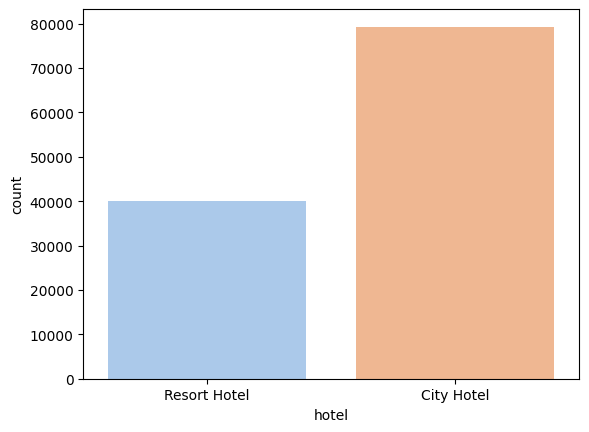

In [42]:
sns.countplot(data=data, x="hotel", hue="hotel", palette='pastel')


Podobnou informaci můžeme získat i pomocí metody `value_counts()`, kterou použijeme pro sérii `hotel`. Metoda `value_counts()` jako výchozí chování vrací výsledky seřazené od nejčastějších (tj. seřazené sestupně). 

In [38]:
data["hotel"].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Pokud chceme hodnoty seřadit vzestupně, můžeme použít parametr `ascending`.

In [39]:
data["hotel"].value_counts(ascending=True)

hotel
Resort Hotel    40060
City Hotel      79330
Name: count, dtype: int64

Zkusme nyní použít parametr `hue`, který umožní přidat do vizualizace další kategorickou proměnnou. Zobrazme si pro každý typ hotelu počet zrušených a nezrušených rezervací.

<Axes: xlabel='hotel', ylabel='count'>

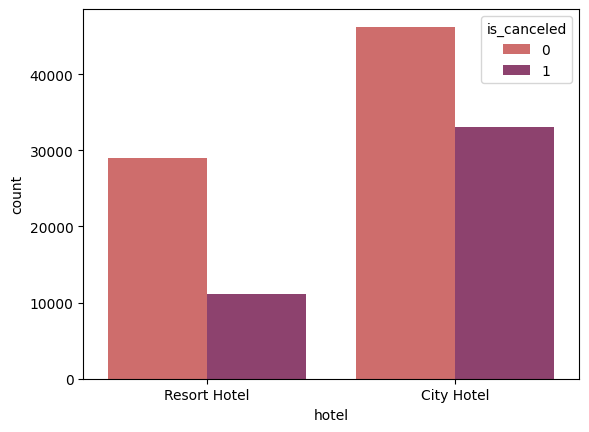

In [43]:
sns.countplot(data=data, x="hotel", hue="is_canceled", palette='flare')

U některých kategorií nám nemusí vyhovovat výchozí způsob řazení. Například u měsíců by bylo logické, aby byly v grafu seřazeny stejně jako v kalendáři. K tomu můžeme využít parametr `order`, kterému dáme jako parametr seznam jednotlivých kategorií v pořadí, v jakém mají být zobrazeny.

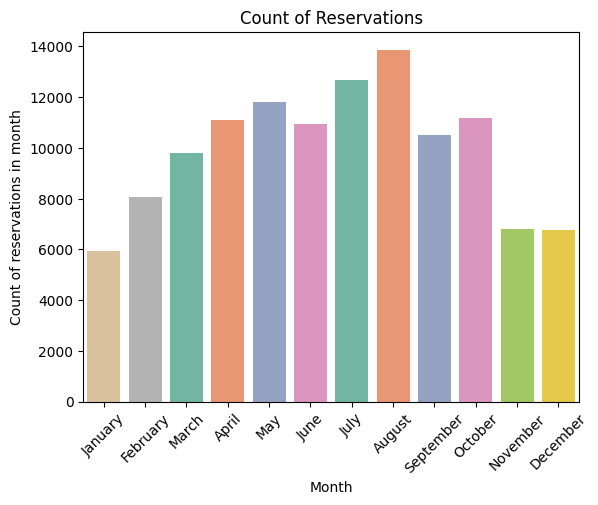

In [31]:
month_sorted = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(data=data, x="arrival_date_month", order=month_sorted)
sns.countplot(x=data['arrival_date_month'],hue=data['arrival_date_month'], order=month_sorted, palette='Set2', legend = False)
ax.set(xlabel="Month", ylabel="Count of reservations in month",
       title="Count of Reservations")
ax.tick_params(axis='x', rotation=45)


Tento graf má určité formální nedostatky. Především se překrývají popisky na ose *x*, dále bychom měli do grafu přidat trochu srozumitelnější popisky. Jako první krok si uložíme výstup funkce `countplot`, což je proměnná typu `Axes`. Jedná se o jakýsi "odkaz" na graf. Pomocí něj můžeme náš graf dále upravovat - například měnit popisky os, přidat titulek atd. Použijeme metodu `set` a nastavíme popisek osy *x* (`xlabel`), popisek osy *y* (`ylabel`) a titulek (`title`). Dále nastavíme parametry osy `x` pomocí metody `tick_params` (zvolíme `axis=x` a poté použijeme parametr `rotation`, abychom otočili popisky o 45 stupňů).

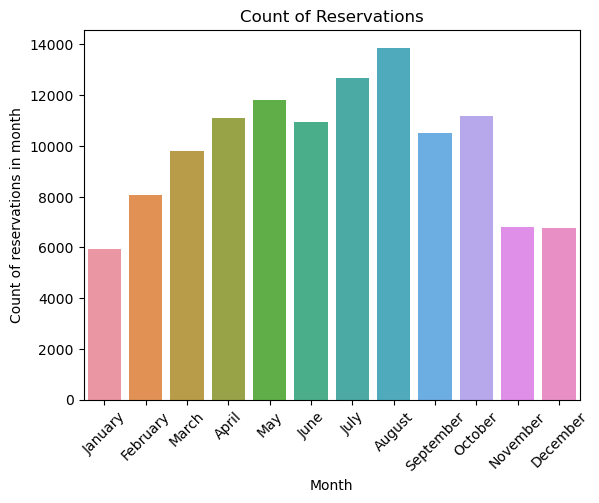

In [42]:
order = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(data=data, x="arrival_date_month", order=order)

ax.set(xlabel="Month", ylabel="Count of reservations in month",
       title="Count of Reservations")
ax.tick_params(axis='x', rotation=45)



Nakonec opět můžeme přidat parametr `hue`.

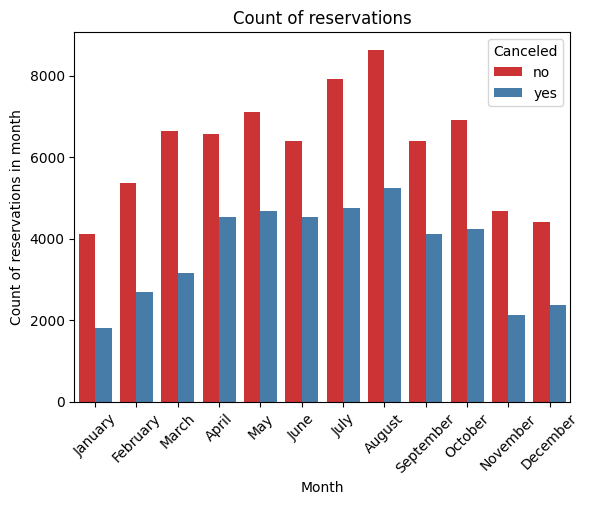

In [37]:
order = ['January', 'February', 'March', 'April', 'May', 'June',
         'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(data=data, x='arrival_date_month',
                   hue="is_canceled", order=order, palette='Set1')

ax.set(xlabel="Month", ylabel="Count of reservations in month",
       title="Count of reservations")
ax.legend(labels=["no", "yes"], title="Canceled")
ax.tick_params(axis='x', rotation=45)

Asi bychom čekali, že zrušení rezervace bude ovlivněné tím, jak moc dopředu někdo rezervaci dělá. Například pokud děláme rezervaci rok dopředu, může se stát spousta věcí, která nám překazí naše plány a my rezervaci zrušíme. Pokud ji děláme den dopředu nebo dokonce v den začátku ubytování, spíše už ji rušit nebudeme. Zkusme si nyní zobrazit histogram dle sloupce `lead_time`.

Protože počet dní před zrušením není kategoriální hodnota a v datech se vyskytuje velké množství různých hodnot, použijeme [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html).

<Axes: xlabel='lead_time', ylabel='Count'>

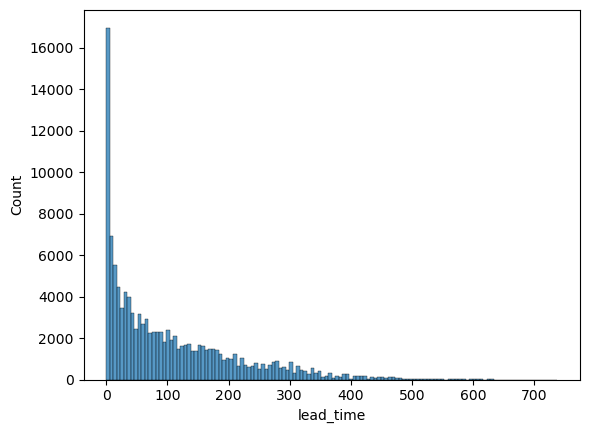

In [44]:
sns.histplot(data=data, x="lead_time")

V datech vidíme, že existuje i velmi malé množství rezervací dělaných dva roky dopředu. Abychom graf udělali přehlednějším, omezíme si data pomocí dotazu.

In [45]:
data_lead_time_1_year = data[data["lead_time"] <= 365]

Vidíme, že většina rezervací probíhá blízko začátku ubytování.

<Axes: xlabel='lead_time', ylabel='Count'>

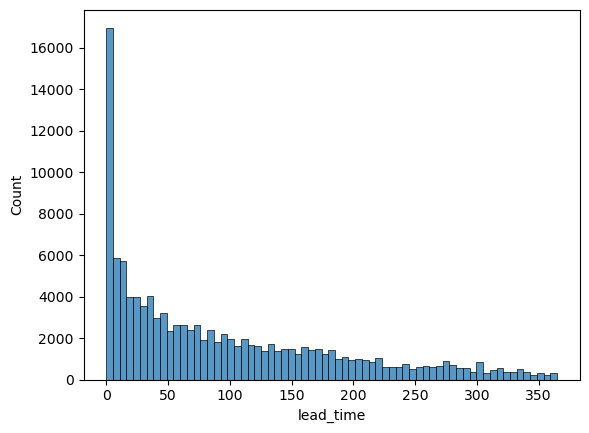

In [46]:
sns.histplot(data=data_lead_time_1_year, x="lead_time")

Přidejme nyní zrušení. Můžeme použít výchozí zobrazení, kde jsou jednotlivé sloupce přes sebe.

<Axes: xlabel='lead_time', ylabel='Count'>

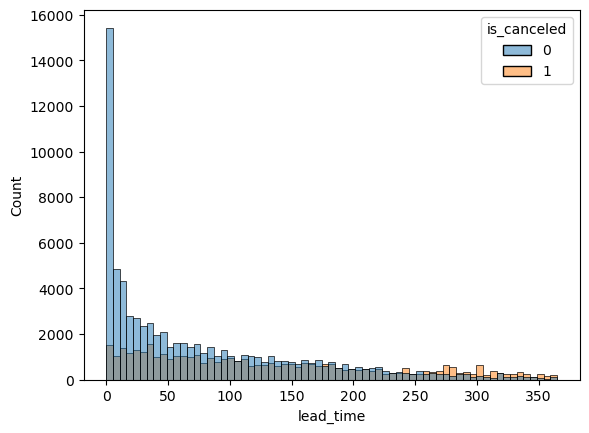

In [47]:
sns.histplot(data=data_lead_time_1_year, x="lead_time", hue="is_canceled")

Alternativně můžeme použít parametr `multiple` a nastavit mu hodnotu `stack`, tím pádem budou hodnoty naskládané "na sobě".

Vidíme, že `lead_time` na zrušení rezervace skutečně vliv má. U rezervací dělaných dlouho dopředu dochází ke zrušení velmi často, u rezervací na poslední chvíli relativně málo.

<Axes: xlabel='lead_time', ylabel='Count'>

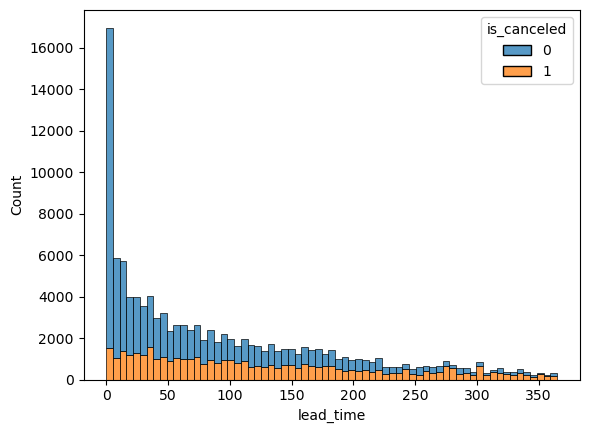

In [48]:
sns.histplot(data=data_lead_time_1_year, x="lead_time",
             hue="is_canceled", multiple="stack")

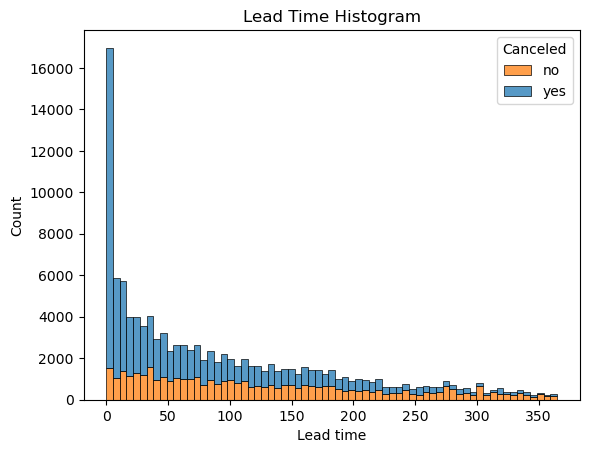

In [49]:
ax = sns.histplot(data=data_lead_time_1_year, x="lead_time",
                  hue="is_canceled", multiple="stack")
ax.set(xlabel="Lead time", ylabel="Count", title="Lead Time Histogram")
ax.legend(labels=["no", "yes"], title="Canceled")

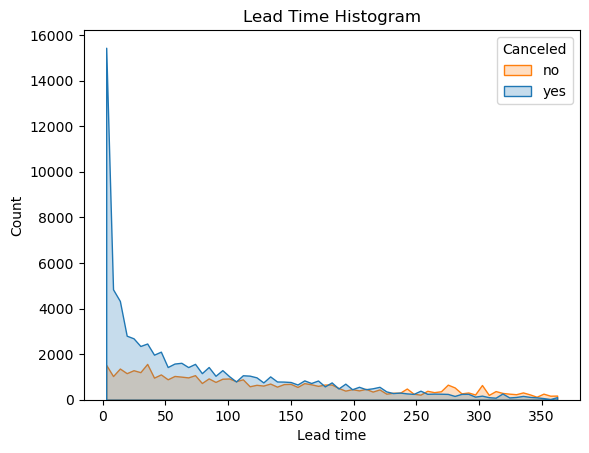

In [50]:
ax = sns.histplot(data=data_lead_time_1_year, x="lead_time",
                  hue="is_canceled", element="poly")
ax.set(xlabel="Lead time", ylabel="Count", title="Lead Time Histogram")
ax.legend(labels=["no", "yes"], title="Canceled")

## Cvičení

Rozhodnutí o zrušení rezervace může záviset na tom, jak dlouho uživatelé plánují v hotelu zůstat. 

1. Začni s počtem ve všední den (`stays_in_week_nights`). V datech jsou některé pobyty s extrémně dlouhou dobou. Napiš dotaz, který vytvoří tabulku, kde jsou pobyty kratší než 10 všedních dní. Poté vytvoř graf, který zobrazuje počty zrušených a nezrušených rezervací dle počtu všechních dní, na které je rezervace plánována.
1. Nyní budeme uvažovat celkovou délku pohybu. Vytvoř sloupec `total_length`, který bude dán součtem sloupců `stays_in_weekend_nights` a `stays_in_week_nights`. Pomocí dotazu dále vytvoř tabulku, která bude obsahovat pouze řádky s hodnotou ve sloupci `total_length` větší než 0 (rezervace s nulovou délkou jsou totiž podivnosti, které z naší analýzy vyřadíme) a současně menší než 10.
1. Do zrušení rezervace může zasahovat i cena. Protože cena služeb obecně silně závisí na zemi, ve které hotel je, vybereme jen jednu zemi. Podívej se na sloupec `country` a vyber druhou nejčastěji se vyskytující zemi. Cena za pokoj je ve sloupci `adr`. Opět je potřeba zbavit se extrémních pozorování, uvažuj pouze řádky s hodnotou `adr` do 300. Poté vytvoř graf, který zobrazuje počty zrušených a nezrušených rezervací v závislosti na její ceně.

## Bonus

Stáhni si data [inventory.csv](data/inventory.csv), která obsahují informace o prodejích a skladových zásobách různých produktů v jednom e-shopu.

1. Produkty jsou skryty v kódech, které jsou ve sloupci `product_code`. Kolik jich je? Vypiš všechy unikátní hodnoty v tomto sloupci.
1. E-shop má problémy se zásobováním a produkty jsou občas vyprodané. Vytvoř graf, který pro jednotlivé kódy produktů zobrazí počty dnů, kdy je produkt vyprodán. Množství produktů je ve sloupci `quantity` (a pokud je produkt vyprodán, je ve sloupci `quantity` hodnota 0).
1. Vytvoř graf průměrných prodejů v jednotlivých měsících. Měsíc najdeš ve sloupci `month`. Pro vytvoření grafu můžeš použít `barplot()`, který funguje podobně jako `countplot()`. Parametry `data`, `x` a `hue` nastav podle stejné logiky, jako bys tvořila `countplot()`. Dále použij parametr `y`, nastav mu hodnotu `sold`. 

### Nápověda:

* U bodu 2 můžeš pomocí dotazu nejprve vytvořit tabulku, která obsahuje pouze řádky, kdy je daný produkt vyprodán. Poté můžeš použít graf `countplot()`.